Hierarchical Clustering example code 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
#To make the dendrograms
import plotly.figure_factory as ff

#To use the built-in hierarchical clustering function
from scipy.cluster.hierarchy import dendrogram, linkage

In [3]:
class DivisiveHierarchicalClustering:
    def __init__(self, n_clusters):
        # Attributes of the class 
        self.n_clusters = n_clusters
        self.labels = None
        self.centroids = None

    # Methods of the class 
    def fit(self, X):
        n_samples, _ = X.shape
        self.labels = np.zeros(n_samples) #initailizing all data points into the same cluster label
        self._divide_cluster(X)

    def _divide_cluster(self, X):
        clusters = [X] #initailizing all data points into the same cluster
        while len(clusters) < self.n_clusters:
            max_dist_cluster_index = self._find_max_dist_cluster(clusters, X)
            max_dist_cluster = clusters[max_dist_cluster_index]
            del clusters[max_dist_cluster_index] #removing the point that is farthest from the cluster 
            subclusters = self._bisect(max_dist_cluster) 
            clusters.extend(subclusters)
        self.labels = np.zeros(X.shape[0])
        self.centroids = []
        for i, cluster in enumerate(clusters):
            self.labels[np.isin(X, cluster).all(axis=1)] = i
            self.centroids.append(np.mean(cluster, axis=0))

    def _find_max_dist_cluster(self, clusters, X):
        ''' 
        Function to find the cluster that contains the data point that will be seperated from the totality  
        '''
        max_distance = float('-inf')
        max_dist_cluster_index = 0
        for i, cluster in enumerate(clusters):
            dist = self._max_pairwise_distance(cluster, X)
            if dist > max_distance:
                max_distance = dist
                max_dist_cluster_index = i
        return max_dist_cluster_index

    def _max_pairwise_distance(self, cluster, X):
        ''' 
        Calculate the 2-norm distances between all data points against a cluster and determine the maximum distance 
        '''
        distances = cdist(cluster, X)
        max_distance = np.max(distances)
        return max_distance

    def _bisect(self, cluster):
        ''' 
        Subdividing the cluster that is the most dissimilar  
        '''
        #_, n_features = cluster.shape
        dimension = np.argmax(np.var(cluster, axis=0)) #identifying the point in the cluster with the highest variance amoungst that cluster 
        mean = np.mean(cluster[:, dimension]) #calculating the centroid of the cluster that will be subdivided 
        cluster1 = cluster[cluster[:, dimension] <= mean]
        cluster2 = cluster[cluster[:, dimension] > mean]
        return [cluster1, cluster2]


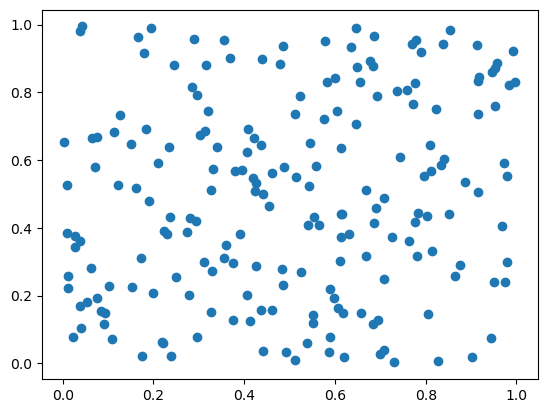

In [4]:
x = np.random.uniform(0, 1, 200)
y = np.random.uniform(0, 1, 200)
z = np.row_stack((x, y))
#print(X)
plt.scatter(z[0],z[1])
#plt.title('Data')

X = np.column_stack((x, y))

In [6]:
n_clusters=5
divisive_hc = DivisiveHierarchicalClustering(n_clusters)
divisive_hc.fit(X)

#print("Labels:", divisive_hc.labels)
#print("Centroids:", divisive_hc.centroids)

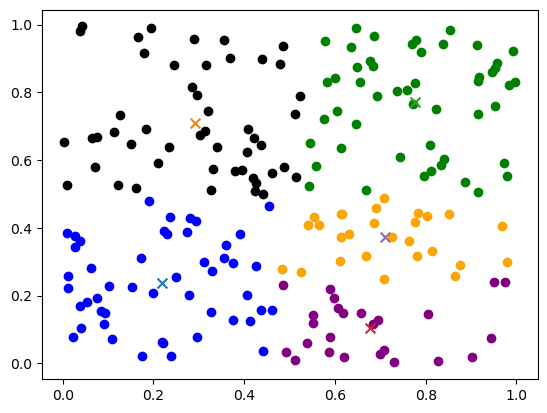

In [8]:
colors = ['blue', 'black', 'green', 'purple', 'orange', 'yellow', 'cyan', 'violet']
for i in range(len(z[0])):
    for j in range(n_clusters):
        if divisive_hc.labels[i] == j:
            plt.scatter(z[0][i], z[1][i], color = colors[j])
        else:
            continue
            #plt.scatter(z[0][i], z[1][i], color = 'k')
for i in range(n_clusters):
    plt.scatter(divisive_hc.centroids[i][0], divisive_hc.centroids[i][1], marker ='x', label=f'Centroid {i+1}', s =50)
    #plt.scatter(divisive_hc.centroids[1][0], divisive_hc.centroids[1][1], marker ='.', label='Centroid 2' , s =50)
#plt.legend()
#plt.title("Divisive Hierarchical Clustering Results")
plt.show()